In [17]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("Data_Train.csv")

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [21]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [22]:
df['Total_Stops'] = df['Total_Stops'].ffill(axis=0)

In [23]:
df['Destination'] = df['Destination'].astype('category')
df['Destination'] = df['Destination'].cat.codes
df['Destination']

0        5
1        0
2        1
3        0
4        5
        ..
10678    0
10679    0
10680    2
10681    5
10682    1
Name: Destination, Length: 10683, dtype: int8

In [24]:
df['Source'] = df['Source'].astype('category')
df['Source'] = df['Source'].cat.codes
df['Source']

0        0
1        3
2        2
3        3
4        0
        ..
10678    3
10679    3
10680    0
10681    0
10682    2
Name: Source, Length: 10683, dtype: int8

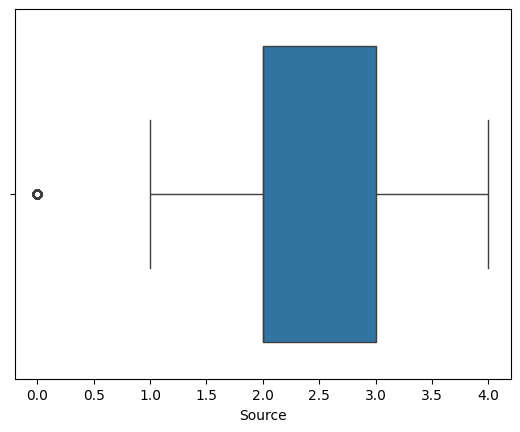

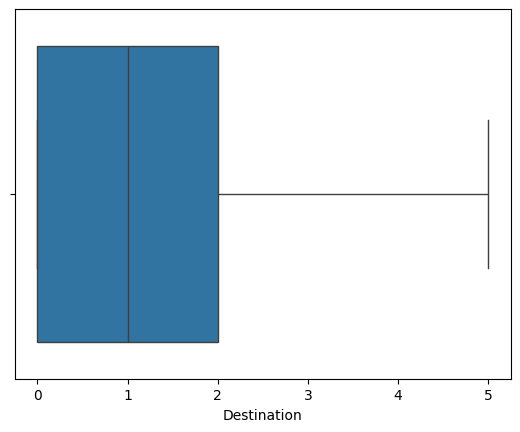

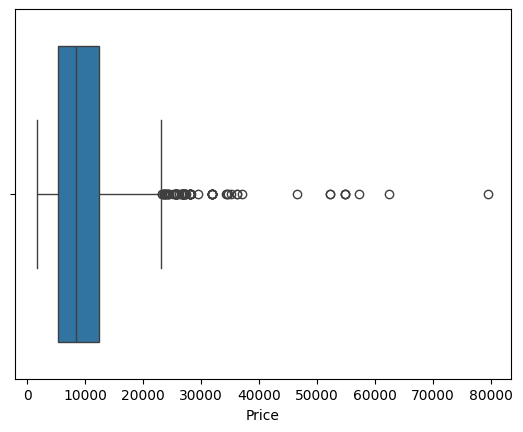

In [29]:
import matplotlib.pyplot as plt
num = df.select_dtypes(include='number')
for column in num :
    plt.figure()
    sns.boxplot(x = df[column], data = df)

In [30]:
import pandas as pd 
from scipy.stats import zscore

column_to_check = ['Price', 'Source']
z_score = df[column_to_check].apply(zscore)
threshold = 3
df = df[(z_score.abs() < threshold).all(axis=1)]
print('After z-score filtering:',df.shape)

After z-score filtering: (10587, 11)


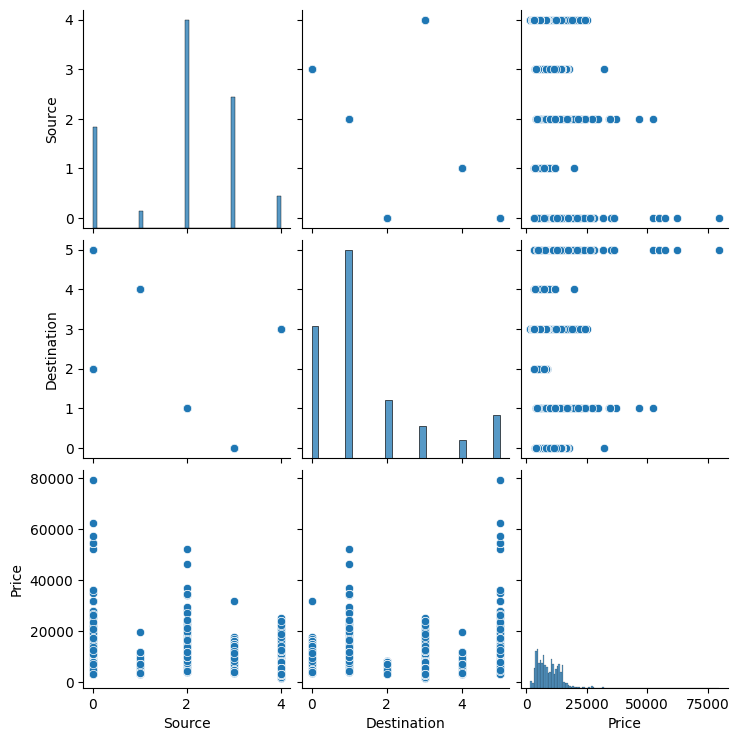

In [31]:
sns.pairplot(data = num)